# Imgo Demo: Augtools

Hello! Welcome to **imgo**, a simple library that makes image data processing quick and easy. **Imgo** is primarily geared towards image classification but can be applied to many other types of projects.

This is a quickstart demonstration of the library's basic functionality. The demo is split into two parts:

- Processing image datasets using Imgo's **uptools** module (see the notebook `uptools_demo.ipynb`)
- Augmenting image data using Imgo's **augtools** module

Also included is a demonstration of some more advanced functionality (see the notebook `advanced_demo.ipynb`).

In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import imageio
import matplotlib.pyplot as plt
%matplotlib inline

## Augmenting Image Datasets with Uptools

**Augtools** is a module that streamlines static data augmentation for computer vision projects. With **augtools**, images can be read from disk, augmented using a number of different image transformation and corruption functions, and saved back to disk. This demonstration aims to provide quickstart documentation for the basic functionality of **augtools**. To begin, ensure **imgo** is installed by running `pip install imgo`. From there we can import **augtools**:

In [2]:
from imgo import augtools

All of **augtools**' functionality is found within its `Augmenter` class. This class represents the data augmentation systems that can be used to generate augmented images. The class comes with several attributes and methods that can be used to complete augmentation tasks in a single line of code.

### Quickstart

In order to get to work with image augmentation, we begin by instantiating an `Augmenter` object, passing in various augmentation parameters (these will be explained in more detail below):

In [3]:
my_augmenter = augtools.Augmenter(rotate_range=(-22,22),
                                  shear_range=(-20,20),
                                  dropout_pair=(0.1,0.9),
                                  x_scale=(0.5,1.2),
                                  y_scale=(0.5,1.2),
                                  x_shift=(-0.1,0.1),
                                  y_shift=(-0.1,0.1),
                                  clip_limit=(1,10),
                                  pwa_scale=(0.01,0.09),
                                  h_flip=0.3,
                                  v_flip=0.3,
                                  g_sev=2,
                                  b_sev=3,
                                  e_sev=2,
                                  contrast=True,
                                  sharpness=True,
                                  fill_mode="reflect",
                                  randomize_params=True)

This `Augmenter` object is initialized with a parameter for all of the transformation and corruption functions. Any number of them can be ignored by setting the parameter value to `None` or simply by not providing the argument. At any time, we can inspect our augmenter by calling the `details` method:

In [4]:
my_augmenter.details()

Augmenter initialized with the following parameter ranges:
----------------------------------------------------------
b_sev               3
clip_limit          (1, 10)
contrast            True
dropout_pair        (0.1, 0.9)
e_sev               2
g_sev               2
h_flip              0.3
pwa_scale           (0.01, 0.09)
rotate_range        (-22, 22)
sharpness           True
shear_range         (-20, 20)
v_flip              0.3
x_scale             (0.5, 1.2)
x_shift             (-0.1, 0.1)
y_scale             (0.5, 1.2)
y_shift             (-0.1, 0.1)
-
fill_mode           reflect
randomize_params    True


Let's take a quick look at what this augmenter produces using an image located in the `demo_img_data` folder:

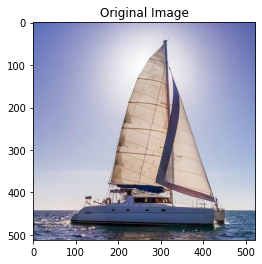

In [5]:
img = imageio.imread("demo_img_data/imgs_a/boat/boat_1.jpg")
plt.imshow(img)
plt.title("Original Image")
plt.show()

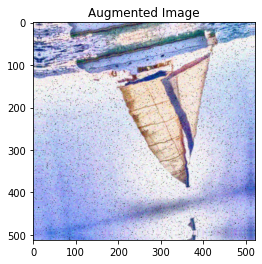

In [6]:
augmented_img = my_augmenter.random_augment(img)
plt.imshow(augmented_img)
plt.title("Augmented Image")
plt.show()

In this image we can see that a number of transformations have been applied to the original image. This has been done simply by calling the `random_augment` method, which applies the `Augmenter` object we initialized above to a raw image. 

The `random_augment` method applies each of the transformations in a random order, with the parameters randomized to within the ranges specified in the arguments. This means that if we use the same augmenter again, we will get different results:

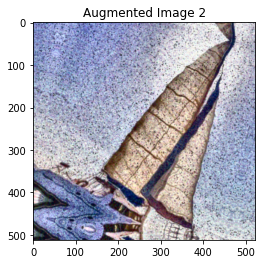

In [7]:
augmented_img_2 = my_augmenter.random_augment(img)
plt.imshow(augmented_img_2)
plt.title("Augmented Image 2")
plt.show()

### Augmentation Functions

**Augtools** `Augmenter` objects come with 14 different augmentation functions to be applied to image data. These are all built as wrappers around `imgaug`'s powerful augmentation systems, for more information see https://imgaug.readthedocs.io/en/latest/.

The `Augmenter` object initialized above as `my_augmenter` contains a value for each of the 16 possible augmentation function parameters. This means that it is applying, in some semi-random way, all of the following transformations to the image:

- Rotation
- Shear
- Pixel Dropout
- X-axis Scaling
- Y-axis Scaling
- X-axis Translation
- Y-axis Translation
- Contrast Limited Adaptive Histogram Equalization (CLAHE)
- Piecewise Affine Transformation
- Horizontal Flip
- Vertical Flip
- Gaussian Noise
- Brightness Adjustment
- Elastic Transformation
- Contrast Adjustment
- Sharpness Adjustment

For the purposes of demonstration, a new `Augmenter` object will be created below for each of these functions, passing only the parameters relevant to the function as arguments and ignoring the others.

**Blank Pixels**

Some of the above functions will produce an augmented image with undefined pixel values (for example, rotation, scaling, shifting, etc). We can specify how these undefined pixel values should be filled by passing a value to the `fill_mode` argument. Passing `"edge"` will fill these pixels with the same values as those occuring on the edge of the image:

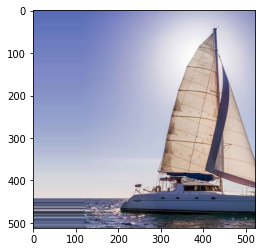

In [8]:
aug_edge_fill = augtools.Augmenter(x_shift=(0.2,0.3),fill_mode="edge")
aug_edge_fill_img = aug_edge_fill.random_augment(img)
plt.imshow(aug_edge_fill_img)
plt.show()

And passing `"reflect"` will fill the pixels by reflecting the image along its edge:

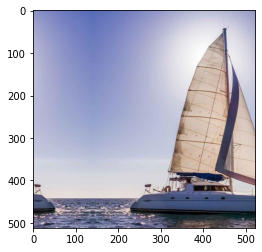

In [9]:
aug_reflect_fill = augtools.Augmenter(x_shift=(0.2,0.3),fill_mode="reflect")
aug_reflect_fill_img = aug_reflect_fill.random_augment(img)
plt.imshow(aug_reflect_fill_img)
plt.show()

**Parameter Randomization**

For some of the functions, the precise amount or degree of the transformation applied is not determinable. Rather, a range is given, and a random value within that range is applied to the image. For others, random value application is ensured by passing the argument `randomize_params=True` to the `Augmenter` object upon initialization. In what follows, this latter type will be denoted as ***determinable***.

**Rotation**

- Function: applies a random rotation to the image.
- Argument: range (min,max) in degrees from which a random rotation angle is drawn. The corresponding function will rotate each image by a randomly chosen angle within this range.

100%|██████████| 4/4 [00:00<00:00, 32.91it/s]


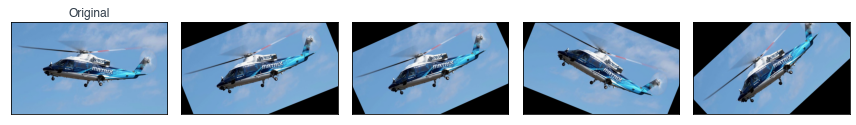

In [10]:
aug_1 = augtools.Augmenter(rotate_range=(-45,45))
aug_1.display_sample("path","demo_img_data/imgs_a",1,5)

**Shear**

- Function: applies random shear to the image.
- Argument: range (min,max) in degrees from which a random shear angle is drawn. The corresponding function will apply a shear adjustment to each image at a randomly chosen angle within this range.

100%|██████████| 4/4 [00:00<00:00, 31.33it/s]


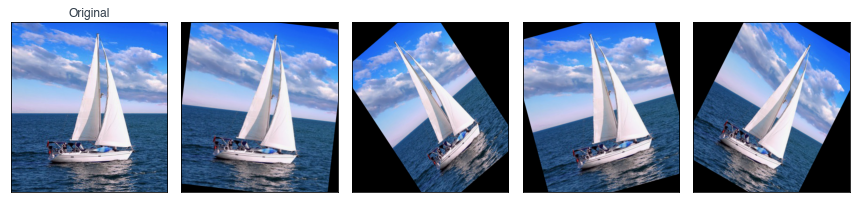

In [11]:
aug_2 = augtools.Augmenter(shear_range=(-35,35))
aug_2.display_sample("path","demo_img_data/imgs_a",1,5)

**Pixel Dropout (Determinable)**

- Function: drops the value of a random subset of pixels to zero.
- Argument: amount and degree (or ranges of both if batch is randomized) of random pixel dropout applied, where the first element is the proportion of pixels to be dropped, and the second is the proportional size of the image from which to drop the pixels (thereby increasing the size of the dropped portions).

100%|██████████| 4/4 [00:00<00:00, 27.28it/s]


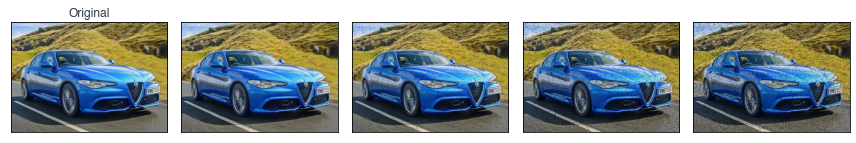

In [12]:
aug_3 = augtools.Augmenter(dropout_pair=(0.1,0.8),randomize_params=True)
aug_3.display_sample("path","demo_img_data/imgs_a",1,5)

**X-Scale**

- Function: squashes or stretches the image along the x-axis.
- Argument: range relative to image size from which a random x-axis scale value is drawn. The corresponding function will scale each image on the x-axis by a randomly chosen proportion within this range. If the scale value is less than 1, the resulting image will be squashed. If the value is greater than 1, the resulting image will be stretched.

100%|██████████| 4/4 [00:00<00:00, 38.30it/s]


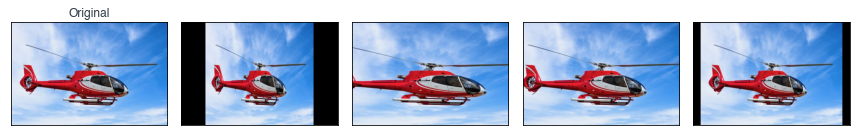

In [13]:
aug_4 = augtools.Augmenter(x_scale=(0.5,1.5))
aug_4.display_sample("path","demo_img_data/imgs_a",1,5)

**Y-Scale**

- Function: squashes or stretches the image along the y-axis.
- Argument: range relative to image size from which a random y-axis scale value is drawn. The corresponding function will scale each image on the y-axis by a randomly chosen proportion within this range. If the scale value is less than 1, the resulting image will be squashed. If the value is greater than 1, the resulting image will be stretched.

100%|██████████| 4/4 [00:00<00:00, 29.63it/s]


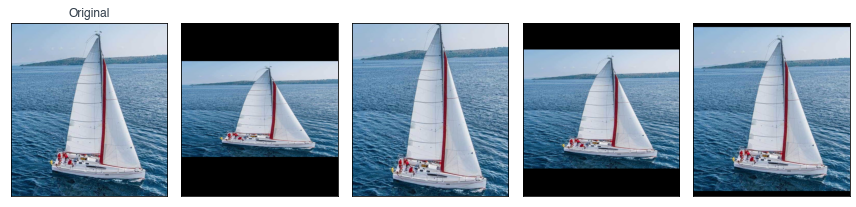

In [14]:
aug_5 = augtools.Augmenter(y_scale=(0.5,1.5))
aug_5.display_sample("path","demo_img_data/imgs_a",1,5)

**X-Shift**

- Function: shifts the image along the x-axis.
- Argument: range relative to image size from which a random x-axis translation is drawn. The corresponding function will shift each image on the x-axis by a randomly chosen proportion within this range.

100%|██████████| 4/4 [00:00<00:00, 27.47it/s]


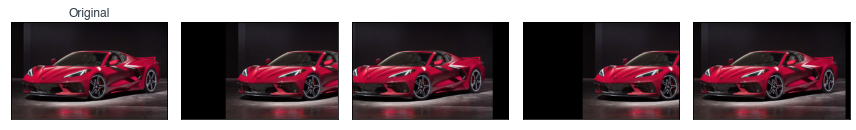

In [15]:
aug_6 = augtools.Augmenter(x_shift=(-0.4,0.4))
aug_6.display_sample("path","demo_img_data/imgs_a",1,5)

**Y-Shift**

- Function: shifts the image along the y-axis.
- Argument: range relative to image size from which a random y-axis translation is drawn. The corresponding function will shift each image on the y-axis by a randomly chosen proportion within this range.

100%|██████████| 4/4 [00:00<00:00, 18.96it/s]


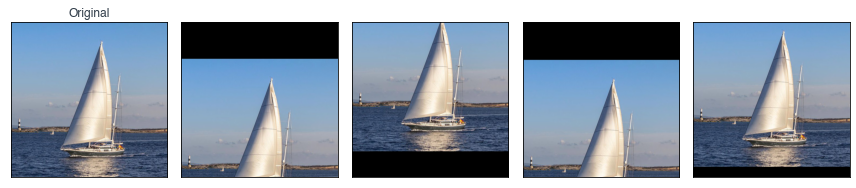

In [16]:
aug_7 = augtools.Augmenter(y_shift=(-0.4,0.4))
aug_7.display_sample("path","demo_img_data/imgs_a",1,5)

**CLAHE**

- Function: applies contrast limited adaptive histogram equalization to the image.
- Argument: range from which random clip limits for CLAH equalization are drawn. The corresponding function will apply a CLAH equalization to each image using a clip limit uniformly sampled from the range.

100%|██████████| 4/4 [00:00<00:00, 34.09it/s]


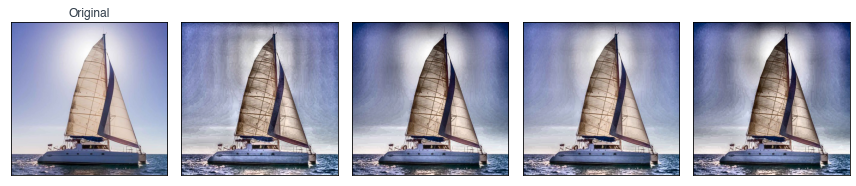

In [17]:
aug_8 = augtools.Augmenter(clip_limit=(1,10))
aug_8.display_sample("path","demo_img_data/imgs_a",1,5)

**Piecewise Affine Transformation**

- Function: moves small pixel neighbourhoods around in various directions.
- Argument: range relative to image size from which random piecewise affine translations are drawn. 

100%|██████████| 4/4 [00:00<00:00,  5.08it/s]


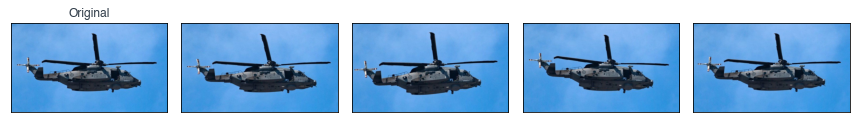

In [18]:
aug_9 = augtools.Augmenter(pwa_scale=(0.01,0.09))
aug_9.display_sample("path","demo_img_data/imgs_a",1,5)

Note that the piecewise affine transformation function is ***very*** slow. The elastic transformation function (see below) can produce a similar (but much less severe) effect in a fraction of the time.

**Horizontal Flip (Determinable)**

- Function: reflects the image in the x-axis direction.
- Argument: proportion of images on which a horizontal flip is performed. The corresponding function will flip these images horizontally.

100%|██████████| 4/4 [00:00<00:00, 35.62it/s]


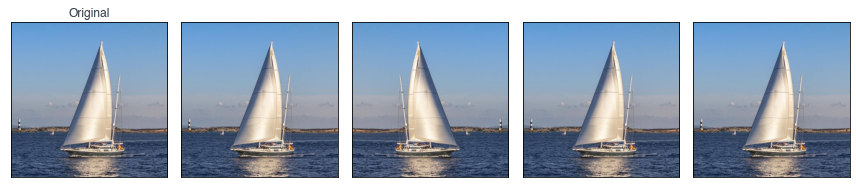

In [19]:
aug_10 = augtools.Augmenter(h_flip=0.5)
aug_10.display_sample("path","demo_img_data/imgs_a",1,5)

**Vertical Flip (Determinable)**

- Function: reflects the image in the y-axis direction.
- Argument: proportion of images on which a vertical flip is performed. The corresponding function will flip these images vertically.

100%|██████████| 4/4 [00:00<00:00, 39.01it/s]


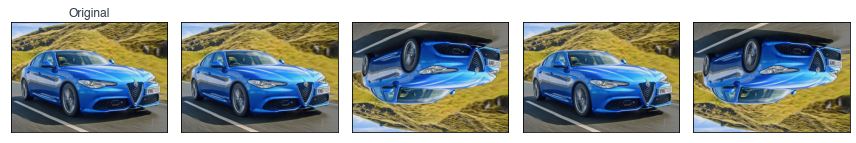

In [20]:
aug_11 = augtools.Augmenter(v_flip=0.5)
aug_11.display_sample("path","demo_img_data/imgs_a",1,5)

**Gaussian Noise (Determinable)**

- Function: adds Gaussian noise to values in the image.
- Argument: amount (or range if batch is randomized) of severity with which Gaussian noise is applied. The corresponding function will apply noise to the images.

100%|██████████| 4/4 [00:00<00:00, 21.64it/s]


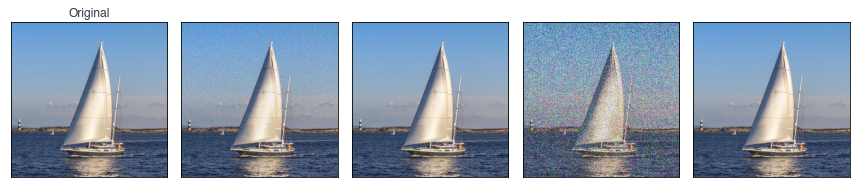

In [21]:
aug_12 = augtools.Augmenter(g_sev=5,randomize_params=True)
aug_12.display_sample("path","demo_img_data/imgs_a",1,5)

**Brightness (Determinable)**

- Function: increases image brightness.
- Argument: amount (or range if batch is randomized) of severity with which brightness is altered. The corresponding function will change the brightness of the images.

100%|██████████| 4/4 [00:00<00:00,  8.31it/s]


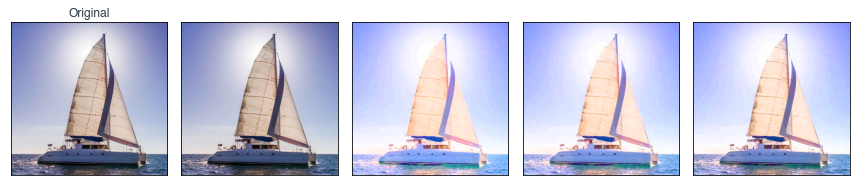

In [22]:
aug_13 = augtools.Augmenter(b_sev=5,randomize_params=True)
aug_13.display_sample("path","demo_img_data/imgs_a",1,5)

**Elastic Transformation (Determinable)**

- Function: applies shear transformation to small pixel neighbourhoods.
- Argument: amount (or range if batch is randomized) of severity with which elastic transformation is applied. The corresponding function will apply the transformation to local areas of the image.

100%|██████████| 4/4 [00:00<00:00,  9.45it/s]


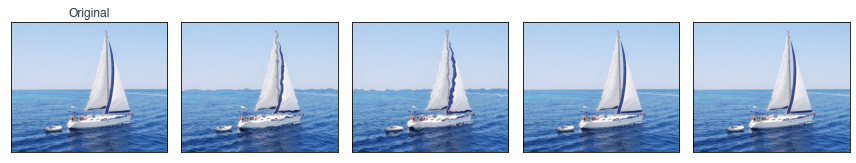

In [23]:
aug_14 = augtools.Augmenter(e_sev=5,randomize_params=True)
aug_14.display_sample("path","demo_img_data/imgs_a",1,5)

**Contrast**

- Function: adjusts the contrast of the image.
- Argument: whether or not random contrast adjustment is applied. If the batch is randomized, a random proportion of the images will be adjusted by the corresponding function.

100%|██████████| 4/4 [00:00<00:00, 27.71it/s]


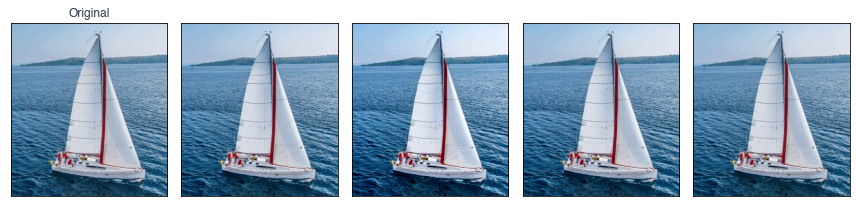

In [24]:
aug_15 = augtools.Augmenter(contrast=True)
aug_15.display_sample("path","demo_img_data/imgs_a",1,5)

**Sharpness**

- Function: adjusts the sharpness of the image.
- Argument: whether or not random sharpness adjustment is applied. If the batch is randomized, a random proportion of the images will be adjusted by the corresponding function.

100%|██████████| 4/4 [00:00<00:00, 27.47it/s]


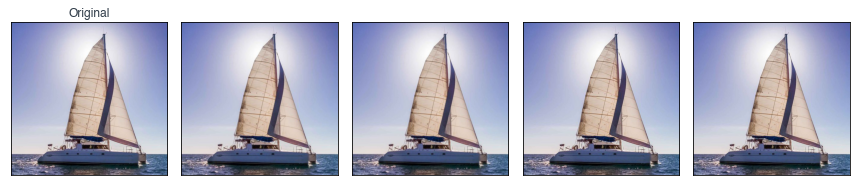

In [25]:
aug_16 = augtools.Augmenter(sharpness=True)
aug_16.display_sample("path","demo_img_data/imgs_a",1,5)

### Class Methods

The `Augmenter` class comes with a number of methods that can help to rapidly apply single or multiple augmentation functions to images, collections of images, or `imgo.uptools` `Image_Dataset` objects. In order to demonstrate these, we will be using the images contained in the `demo_img_data` folder included in the repo.

Let's say we have a collection of images, and we want to apply some augmentation in a simple way. To do this, we could call on the `simple_augment` method, which applies all the `Augmenter` object's augmentation functions, for which an argument has been provided, in a default order (for more on transformation ordering, see the `advanced_demo.ipynb` notebook). Alternatively, we can call the `random_augment` method:

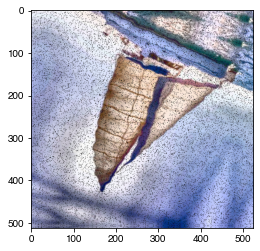

In [26]:
augmented_img = my_augmenter.random_augment(img)
plt.imshow(augmented_img)
plt.show()

Now, if we plan to augment a collection of images, we might like to have some sort of preview of the transformation effects we will end up using. To this end, we can use the `display_sample` method (as we did in the examples above), which fetches a random image from the source given, and applies the `Augmenter` object to it. The source can either be directory on disk containing the images, or it can be an (initialized) `uptools.Image_Dataset` object, and is specified using the `source_type` valid source types being `"path"` for images on disk and `"ids"` for `Image_Dataset` objects) and `source` arguments. The number of augmentation examples to display is selected by passing the number of rows and columns as arguments, and the use of either random or simple augmentation methods can be specified by passing `"random"` or `"simple"`  through the argument `augment_type`.

**Caution:** When augmenting images from disk (whether using simple or random augmentation methods), it is important to specify whether the image data has been normalized prior to augmentation. This can be done by passing the argument `pre_norm=True`. However, if augmenting images from an `Image_Dataset` object, it is important **not** to set this argument to `True` because the method will automatically call upon the non-normalized version of the image. Note also that standardized image data cannot be augmented.

For an image on file:

100%|██████████| 15/15 [00:08<00:00,  1.85it/s]


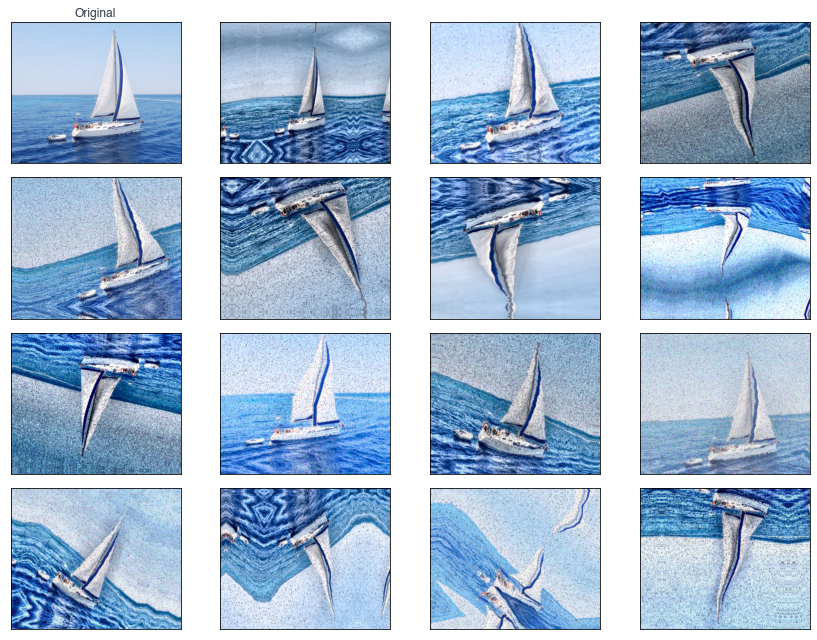

In [27]:
my_augmenter.display_sample("path","demo_img_data/imgs_a",4,4)

For an `Image_Dataset`:

In [28]:
# initialize Image_Dataset object
from imgo import uptools
my_image_dataset = uptools.Image_Dataset('demo_img_data/imgs_a',"imgs",180)

Processing X_data: 100%|██████████| 15/15 [00:00<00:00, 1536.11it/s]

Image_Datset initialized successfully.


100%|██████████| 15/15 [00:01<00:00, 11.29it/s]


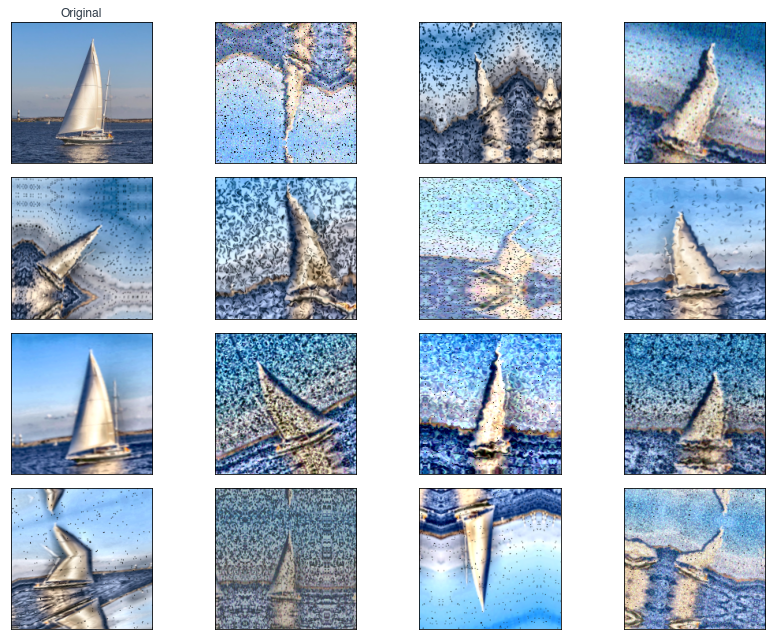

In [29]:
my_augmenter.display_sample("ids",my_image_dataset,4,4,augment_type="random")

With this display, we can decide whether the augmentation parameters are too severe or not severe enough, and adjust them accordingly.

### Augment and Save to Disk

It may be the case that our image datasets require some additional images, perhaps because the set itself is too small, or because there is some class imbalance that needs to be corrected. We can generate new images using the image augmentation system initialized as an `Augmenter` object, and save the new images to disk. This can be done very simply using the `augment_flow` method. Assuming we have images saved in a folder, which itself might contain sub-folders for each image class, all we have to do is call the `augment_flow` method on our `Augmenter` object, and pass in a few arguments:

The `base_path` argument tells the `Augmenter` where the images are located on the disk. If the images are organized in class subfolders, these will be detected automatically. If the argument `save` is given as `True`, the augmented images will be saved in the same folders as the originals (if there are no class subfolders, a new folder will be created under `imgo_output/augtools/augment_flow` to house augmented images). We can also choose to augment only a single class, or a subset of classes, by passing a list of class names into the `class_selection` argument. 

The number of augmented images generated depends on the values passed for the `size` and `number` arguments. The `number` argument specifies how many images to generate, while the `size` argument specifies the new size of the image sets for each class (or in total if the images are not organized into subfolders), and the number of images generated will be equal to the difference between the number of original images and the number given as the `size` argument. Class imbalances witin datasets can be corrected by using the `size` argument.

Finally, we can select whether to use `"simple"` or `"random"` augmentation by passing the relevant keyword to the `augment_type` argument.

In [30]:
# generating images from class subdirectories
my_augmenter.augment_flow("demo_img_data/imgs_a",size=10,save=True)

/opt/anaconda3/lib/python3.7/site-packages/imgo/uptools.py:364: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  img_array = np.array(img_list)
100%|██████████| 5/5 [00:03<00:00,  1.65it/s]

Augmented images saved successfully in class subdirectories.


And there we have it! The augmented images are saved in the appropriate class subdirectories within the `demo_img_data` folder. We can also do the same for images in directories not organized by class:

In [31]:
# generating images from single directory
my_augmenter.augment_flow("demo_img_data/imgs_b",number=5,save=True)

/opt/anaconda3/lib/python3.7/site-packages/imgo/uptools.py:364: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  img_array = np.array(img_list)
100%|██████████| 5/5 [00:02<00:00,  1.83it/s]

Augmented images saved successfully.


## Volià!

For more information on **augtools**, please see the README located in the GitHub repo. Happy machine learning!